<a href="https://colab.research.google.com/github/yommigold/Python_/blob/main/Binning_and_Normalisation_Activities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Binning and Normalisation Activities

In [1]:
import pandas as pd
import numpy as np


In [10]:
df=pd.read_excel('auto_mpg.xlsx')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


In [11]:
#1. Drop column Origin from the dataset.

df.drop(columns=['origin'], inplace=True)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [49]:
#2a. Find out all the missing values in the dataset
df.isnull().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      2
model year        2
origin            0
car name          0
CAR Number        7
horsepower_bin    0
dtype: int64

In [14]:
#2b. Replace it with its most appropriate replacement

ms = df.isnull().sum() # ms=missing value

df['horsepower'].fillna(df['horsepower'].median(), inplace=True) # Replace missing values in 'horsepower' column with the median

df['acceleration'].fillna(df['acceleration'].mean(), inplace=True) # Replace missing values in 'acceleration' column with the mean

df['model year'].fillna(df['model year'].mode()[0], inplace=True) # Replace missing values in 'model_year' column with the mode


In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [17]:
#3. Find and remove duplicate entries for the column ‘CAR Number’

df.drop_duplicates(subset='CAR Number', inplace=True)
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [19]:
#4a. Display the first five and last five rows
#4a1. Display the first five rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [20]:
#4a. Display the last five rows

df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67
97,18,6,225.0,105,3121,16.5,73.0,plymouth valiant,HUYT76


In [25]:
#4b. Display all the column names in the dataset
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'CAR Number'],
      dtype='object')

In [23]:
#4c. Display the concise summary of your dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 97
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           90 non-null     int64  
 1   cylinders     90 non-null     int64  
 2   displacement  90 non-null     float64
 3   horsepower    90 non-null     int64  
 4   weight        90 non-null     int64  
 5   acceleration  90 non-null     float64
 6   model year    90 non-null     float64
 7   car name      90 non-null     object 
 8   CAR Number    89 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 7.0+ KB


In [27]:
#4d. Display the name of the car with maximum number of horsepower.
car_max_hp = df['horsepower'].idxmax()
car_name = df.loc[car_max_hp, 'car name']
print(f"Car with maximum horsepower: {car_name}")


Car with maximum horsepower: pontiac catalina


In [29]:
#5. Change the name of the column "mpg" to "L/100km"

df.rename(columns={'mpg': 'L/100km'}, inplace=True)
df.head()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [35]:
#6. Normalize the column “Weight” so that the values range from 0 to 1

df['weight'] = (df['weight'] - df['weight'].min()) / (df['weight'].max() - df['weight'].min())
df.head()

,L/100km,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,0.514108,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,0.570241,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,0.493911,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,0.493020,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,0.497772,10.5,70.0,ford torino,JEETMEET


In [46]:
#7. Normalizing the columns

# Normalize the column "displacement" so that the values range from 0 to 1
df['displacement'] = (df['displacement'] - df['displacement'].min()) / (df['displacement'].max() - df['displacement'].min())

# Normalize the column "acceleration" so that the values range from 0 to 1
df['acceleration'] = (df['acceleration'] - df['acceleration'].min()) / (df['acceleration'].max() - df['acceleration'].min())

# Normalize the column "model year" so that the values range from 0 to 1
df['model year'] = (df['model year'] - df['model year'].min()) / (df['model year'].max() - df['model year'].min())

# Display the first five rows of the normalized dataset
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number,horsepower_bin,z_score
0,18,8,0.615584,130,3504,0.258065,0.0,1,chevrolet chevelle malibu,L6V 043,Medium,-0.021353
1,15,8,0.727273,165,3693,0.225806,0.0,1,buick skylark 320,RTY079,High,0.711062
2,18,8,0.644156,150,3436,0.193548,0.0,1,plymouth satellite,MTP600,Medium,0.397170
3,16,8,0.607792,150,3433,0.258065,0.0,1,amc rebel sst,MNJ000,Medium,0.397170
4,17,8,0.602597,140,3449,0.161290,0.0,1,ford torino,JEETMEET,Medium,0.187908


In [47]:
#8. Replace original value by (original value)/(maximum value)

# Normalize the column "horsepower" so that the values range from 0 to 1
df['horsepower'] = df['horsepower'] / df['horsepower'].max()

# Display the first five rows of the normalized dataset
df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number,horsepower_bin,z_score
0,18,8,0.615584,0.577778,3504,0.258065,0.0,1,chevrolet chevelle malibu,L6V 043,Medium,-0.021353
1,15,8,0.727273,0.733333,3693,0.225806,0.0,1,buick skylark 320,RTY079,High,0.711062
2,18,8,0.644156,0.666667,3436,0.193548,0.0,1,plymouth satellite,MTP600,Medium,0.397170
3,16,8,0.607792,0.666667,3433,0.258065,0.0,1,amc rebel sst,MNJ000,Medium,0.397170
4,17,8,0.602597,0.622222,3449,0.161290,0.0,1,ford torino,JEETMEET,Medium,0.187908


In [38]:
#9. Using the price difference between cars with high horsepower, medium horsepower, and little horsepower, rearrange them into three ‘bins' to simplify analysis?

import pandas as pd
# Create bins based on horsepower
bins = [0, 100, 150, float('inf')]
labels = ['Low', 'Medium', 'High']

# Create a new column with the bin labels
df['horsepower_bin'] = pd.cut(df['horsepower'], bins, labels=labels)

# Calculate the average price for each bin
avg_price_by_bin = df.groupby('horsepower_bin').mean()

# Print the average price for each bin
print(avg_price_by_bin)


                  L/100km  cylinders  displacement  horsepower    weight  \
horsepower_bin                                                             
Low             23.447368   4.447368    135.986842   85.105263  0.197755   
Medium          15.952381   7.428571    295.809524  139.619048  0.564951   
High            13.096774   8.000000    386.354839  185.677419  0.760608   

                acceleration  model year  
horsepower_bin                            
Low                16.410362   71.105263  
Medium             12.880952   71.619048  
High               11.677419   71.225806  


<ipython-input-38-fb56c38a6d85>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_price_by_bin = df.groupby('horsepower_bin').mean()


In [48]:
#10. Use the Pandas method 'cut' to segment the 'horsepower' column into 3 bins

import pandas as pd

df = pd.read_excel('auto_mpg.xlsx')

# Define the bins
bins = [0, 100, 150, float('inf')]

# Define the labels for the bins
labels = ['Low', 'Medium', 'High']

# Create a new column with the bin labels
df['horsepower_bin'] = pd.cut(df['horsepower'], bins, labels=labels)

# Print the first five rows of the dataframe
print(df.head())


   mpg  cylinders  displacement  horsepower  weight  acceleration  model year  \
0   18          8         307.0         130    3504          12.0        70.0   
1   15          8         350.0         165    3693          11.5        70.0   
2   18          8         318.0         150    3436          11.0        70.0   
3   16          8         304.0         150    3433          12.0        70.0   
4   17          8         302.0         140    3449          10.5        70.0   

   origin                   car name CAR Number horsepower_bin  
0       1  chevrolet chevelle malibu    L6V 043         Medium  
1       1          buick skylark 320     RTY079           High  
2       1         plymouth satellite     MTP600         Medium  
3       1              amc rebel sst     MNJ000         Medium  
4       1                ford torino   JEETMEET         Medium  


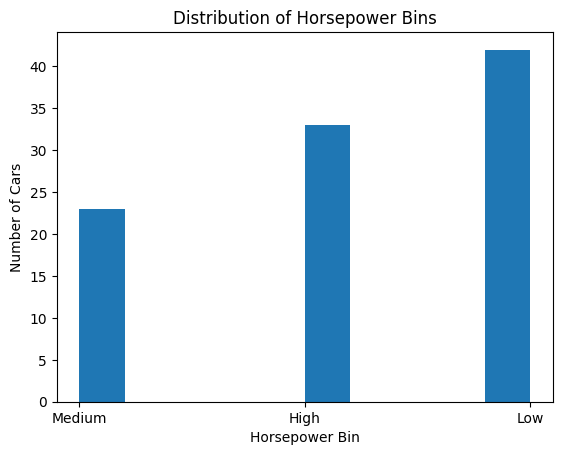

In [42]:
#11. Use a histogram to visualize the distribution of bins we created above.

import matplotlib.pyplot as plt

# Create a histogram of the horsepower bins
plt.hist(df['horsepower_bin'])

# Add labels and title
plt.xlabel('Horsepower Bin')
plt.ylabel('Number of Cars')
plt.title('Distribution of Horsepower Bins')

# Display the histogram
plt.show()


In [45]:
#12. Detect outliers using Z-score and remove them

import pandas as pd

df['z_score'] = (df['horsepower'] - df['horsepower'].mean()) / df['horsepower'].std() # Calculate the z-score for each data point
threshold = 3 # Define the threshold for outliers


outliers = df[df['z_score'] > threshold] # Select the rows where the z-score is greater than the threshold

df = df[df['z_score'] <= threshold] # Remove the outliers from the dataframe

print(df.shape) # Print the shape of the new dataframe


(98, 12)
